<h1><center> PPOL 5203 Final Project <br><br> 
<font color='grey'>Data Visualization Wendy's version<br><br>
Wendy Shi</center></center> <h1>

Reference: https://python-graph-gallery.com/hexbin-map-from-geojson-python/

In [111]:
# Import geopandas library
import geopandas as gpd

# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

In [112]:
geoData.dtypes

cartodb_id                   int64
created_at     datetime64[ns, UTC]
updated_at     datetime64[ns, UTC]
label                       object
bees                       float64
iso3166_2                   object
google_name                 object
geometry                  geometry
dtype: object

In [113]:
geoData.tail()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry
46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5..."
47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5..."
48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5..."
49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4..."
50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325..."


In [114]:
# Import the geoplot library.
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
#plt.rcParams["figure.figsize"]=13,13

# Draw a map with matplotlib
#geoData.plot(color="white", edgecolor='black', linewidth=.5);
#plt.axis('off');

/var/folders/xx/xxcg2dy55gx3nw8brrsbfwhr0000gn/T/ipykernel_1562/415889654.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoData['centroid'] = geoData['geometry'].centroid


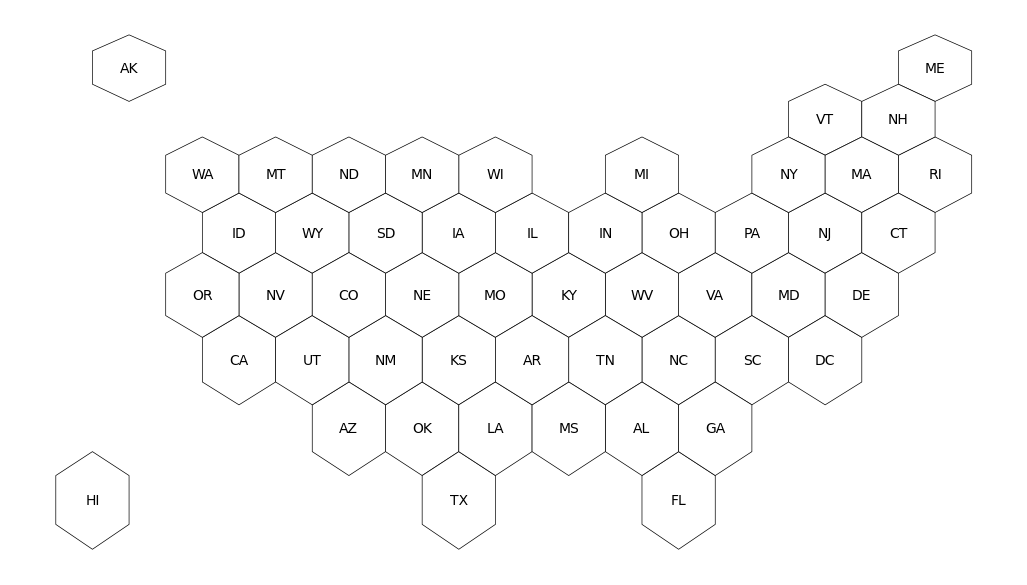

In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt

geoData['centroid'] = geoData['geometry'].centroid

# Redraw the empty hexbin map
geoData.plot(color="white", edgecolor='black', linewidth=0.5)
plt.axis('off')

# For each county, annotate with the county name located at the centroid coordinates
for idx, row in geoData.iterrows():
    centroid_x, centroid_y = row["centroid"].x, row["centroid"].y
    plt.text(centroid_x, centroid_y, s=row["iso3166_2"],
             horizontalalignment='center', va='center')

# Show the plot
plt.show()

##  Load data: US news ranking

In [116]:
import pandas as pd
csv_file_path = '/Users/wendyshi2001/Desktop/DataScience23/Final Project/CSV_data/usnews_ranking.csv'
USnews = pd.read_csv(csv_file_path)
USnews.rename(columns={'Ranking': 'USnews_rank'}, inplace=True)
USnews.tail()

,USnews_rank,State
45,46,Nevada
46,47,Delaware
47,48,Alabama
48,49,Indiana
49,50,Louisiana


In [117]:
state_name_to_abbreviation = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [192]:
USnews['State'] = USnews['State'].replace(state_name_to_abbreviation)
USnews.head()

,USnews_rank,State
0,1,VT
1,2,NH
2,3,NM
3,4,SD
4,5,ME


In [201]:
Dece_US_news = USnews.sort_values(by="USnews_rank",ascending=False)
Dece_US_news.tail()

,USnews_rank,State
4,5,ME
3,4,SD
2,3,NM
1,2,NH
0,1,VT


In [210]:
Dece_US_news["Pollution_scale"] = range(1,51)
Dece_US_news

,USnews_rank,State,Pollution_scale
49,50,LA,1
48,49,IN,2
47,48,AL,3
46,47,DE,4
45,46,NV,5
44,45,OH,6
43,44,UT,7
42,43,KS,8
41,42,TX,9
40,41,TN,10


In [119]:
Dece_US_news["State"] = Dece_US_news["State"].astype(str)
USnews.dtypes

USnews_rank     int64
State          object
dtype: object

In [120]:
geo_reset = geoData.reset_index()
geo_reset.tail()

,index,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid
46,46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5...",POINT (-110.74597 47.46420)
47,47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5...",POINT (-121.63746 47.46420)
48,48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5...",POINT (-116.19171 47.46420)
49,49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4...",POINT (-132.52895 53.45575)
50,50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325...",POINT (-75.34861 44.18058)


In [121]:
geo_reset["State_abbr"] = geo_reset["iso3166_2"].astype(str)
geo_reset.tail()

,index,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,State_abbr
46,46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5...",POINT (-110.74597 47.46420),MN
47,47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5...",POINT (-121.63746 47.46420),MT
48,48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5...",POINT (-116.19171 47.46420),ND
49,49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4...",POINT (-132.52895 53.45575),AK
50,50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325...",POINT (-75.34861 44.18058),CT


In [204]:
USnews_geo = geo_reset.set_index("State_abbr").join(Dece_US_news.set_index("State"))
USnews_reset = USnews_geo.reset_index()
USnews_reset.tail()

,State_abbr,index,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,USnews_rank,Pollution_scale
46,MN,46,295,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Minn.,51.2,MN,Minnesota (United States),"POLYGON ((-110.74597 49.57439, -108.02309 48.5...",POINT (-110.74597 47.46420),13.0,38.0
47,MT,47,297,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Mont.,41.1,MT,Montana (United States),"POLYGON ((-121.63746 49.57439, -118.91459 48.5...",POINT (-121.63746 47.46420),10.0,41.0
48,ND,48,296,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,N.D.,40.4,ND,North Dakota (United States),"POLYGON ((-116.19171 49.57439, -113.46884 48.5...",POINT (-116.19171 47.46420),18.0,33.0
49,AK,49,331,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,A.K.,NaN,AK,Alaska (United States),"POLYGON ((-132.52895 55.31320, -129.80608 54.4...",POINT (-132.52895 53.45575),26.0,25.0
50,CT,50,273,2015-05-13 22:02:22+00:00,2015-10-05 16:00:16+00:00,Conn.,57.5,CT,Connecticut (United States),"POLYGON ((-75.34861 46.41987, -72.62574 45.325...",POINT (-75.34861 44.18058),19.0,32.0


In [129]:
import pandas as pd
mariageData = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/State_mariage_rate.csv")
mariageData.tail()

,state,y_2015,y_2014,y_2013,y_2012,y_2011,y_2010,y_2009,y_2008,y_2007,y_2006,y_2005,y_2004,y_2003,y_2002,y_2001,y_2000,y_1999,y_1995,y_1990
46,Virginia,6.980323,6.744421194,6.657784939,6.8,6.8,6.8,6.9,7.2,7.5,7.8,8.2,8.3,8.4,8.6,8.8,8.8,9.2,10.2,11.4
47,Washington,6.219361,6.956141233,7.110330398,6.3,6.1,6.0,6.0,6.3,6.4,6.5,6.5,6.5,6.5,6.5,7,6.9,7.2,7.7,9.5
48,West Virginia,6.574923,6.669095068,6.644002278,7.0,7.2,6.7,6.7,7.1,7.3,7.3,7.4,7.5,7.5,8.1,7.9,8.7,7.5,6.1,7.2
49,Wisconsin,5.611351,5.691295833,5.219135973,5.4,5.3,5.3,5.3,5.6,5.7,6,6.1,6.2,6.2,6.3,6.5,6.7,6.7,7.0,7.9
50,Wyoming,7.341663,7.658952364,7.549883465,7.6,7.8,7.6,8.0,8.6,9.0,9.3,9.3,9.3,9.3,9.5,10,10,9.9,10.6,10.7


/var/folders/xx/xxcg2dy55gx3nw8brrsbfwhr0000gn/T/ipykernel_1562/2431139547.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );


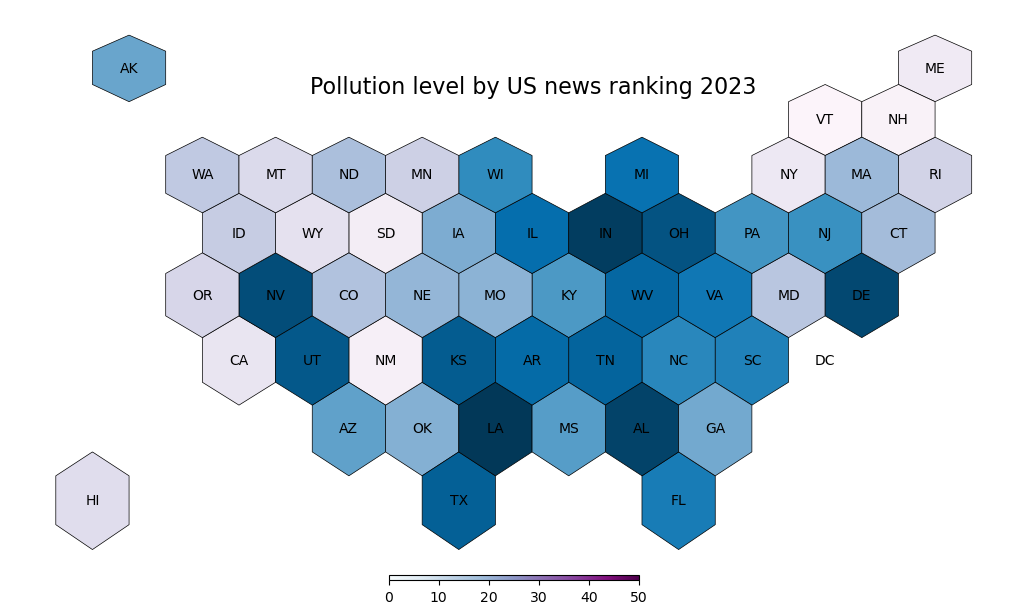

In [211]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
USnews_reset.plot(
    ax=ax,
    column="USnews_rank", 
    cmap="PuBu", 
    norm=plt.Normalize(vmin=0, vmax=50),
    edgecolor='black', 
    linewidth=.5
)

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Pollution level by US news ranking 2023', 
            xy=(300,500),  xycoords='axes pixels', horizontalalignment='left', 
            verticalalignment='top', fontsize=16, color='black')

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    centroid_x, centroid_y = row["centroid"].x, row["centroid"].y
    plt.text(centroid_x, centroid_y, s=row["iso3166_2"],
             horizontalalignment='center', va='center')
    
# Add a color bar
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=0, vmax=50))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );


In [ ]:
# for each county, annotate with the county name located at the centroid coordinates 

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=2, vmax=13))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 ); 

In [213]:
fig.savefig("/Users/wendyshi2001/Desktop/DataScience23/Final Project/USnews_rank.png")